In [ ]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Импорт данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подгружаем датафрейм 
data = pd.read_excel("/content/drive/MyDrive/HW1_var_5.xlsx")
data = data.iloc[:,1:44]

# Создание сводной таблицы 

In [ ]:
#Делаем таблицу с количеством nan, 0, типом данных по столбцам, процентами данных значений
df1 = (data.nunique()).reset_index()
df2 = (data.dtypes).reset_index()
df3 = (data.isna().sum(axis=0)).reset_index()
df4 = ((data == 0).astype(int).sum(axis=0)).reset_index()
df1 = df1.rename(columns = {0: 'count_unique'})
df2 = df2.rename(columns = {0: 'type'})
df3 = df3.rename(columns = {0: 'count_nan'})
df4 = df4.rename(columns = {0: 'count_zero'})
data_1 = pd.merge(df1, df2, left_on = 'index',right_on = 'index')
data_1 = pd.merge(df2, data_1, left_on = 'index', right_on = 'index')
data_1 = pd.merge(data_1, df3, left_on = 'index', right_on = 'index')
data_1 = pd.merge(data_1, df4, left_on = 'index', right_on = 'index')
data_1 = data_1.rename(columns = {'type_x': 'type', 'index': 'variable'})
data_1.insert(3, 'percent_unique', ' ')
data_1.insert(6, 'percent_nan', ' ')
data_1.insert(8, 'percent_zero', ' ')
data_1['percent_unique'] = data_1['count_unique']/data_1['count_unique'].sum() * 100
data_1['percent_nan'] = data_1['count_nan']/data_1['count_nan'].sum() * 100
data_1['percent_zero'] = data_1['count_zero']/data_1['count_zero'].sum() * 100
data_1.drop('type_y', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,variable,type,count_unique,percent_unique,count_nan,percent_nan,count_zero,percent_zero
0,ID,int64,10243,80.230281,0,0.000000,0,0.000000
1,INCOME_BASE_TYPE,object,4,0.031331,57,0.029746,0,0.000000
2,CREDIT_PURPOSE,object,10,0.078327,0,0.000000,0,0.000000
3,INSURANCE_FLAG,int64,2,0.015665,0,0.000000,4104,5.354277
4,DTI,float64,61,0.477794,122,0.063666,1,0.001305
5,SEX,object,2,0.015665,0,0.000000,0,0.000000
6,FULL_AGE_CHILD_NUMBER,int64,7,0.054829,0,0.000000,6154,8.028807
7,DEPENDANT_NUMBER,int64,3,0.023498,0,0.000000,10214,13.325679
8,EDUCATION,object,9,0.070494,0,0.000000,0,0.000000
9,EMPL_TYPE,object,9,0.070494,9,0.004697,0,0.000000


In [ ]:
#Проанализируем полноту данных по клиентам 
df0 = data.isna().sum(axis=1).reset_index()
df0 = df0[df0[0] == df0[0].min()].count()
df0_add = (data == 0).sum(axis=1).reset_index()
df0

index    3663
0        3663
dtype: int64

In [ ]:
#Максимальное количество 0 по клиентам
df0_add[0].max()

25

In [ ]:
data[data.isna().sum(axis=1) == data.isna().sum(axis=1).max()]

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000005,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.26,мужской,0,0,среднее,рабочий,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000065,Форма банка (без печати работодателя),Ремонт,1,0.38,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000185,2НДФЛ,Покупка автомобиля,0,0.19,мужской,1,0,второе высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1000245,Поступление зарплаты на счет,Ремонт,1,0.43,мужской,0,0,*n.a.*,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1000325,Поступление зарплаты на счет,Ремонт,0,0.47,мужской,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1204665,Форма банка (без печати работодателя),Покупка автомобиля,0,0.40,мужской,1,0,Высшее/Второе высшее/Ученая степень,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10234,1204685,Форма банка (без печати работодателя),Покупка автомобиля,1,0.46,мужской,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10236,1204725,Форма банка (без печати работодателя),Ремонт,1,0.29,мужской,0,0,среднее-специальное,вспомогательный персонал,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10238,1204765,Форма банка (без печати работодателя),Ремонт,0,0.17,женский,0,0,среднее-специальное,вспомогательный персонал,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выходная таблица показывает следующее: 
1) большая часть переменных имеет числовой формат, 9 переменных являются категориальными 
2) Начиная с 15-го столбца, количество пропусков составляет примерно 63% от всех значений в датафрейме - убирать нерелеватно, иначе потеряем большую часть данных и кластеризация будет непоказательной 
3) Нулевых значений относительно немного - никаких изменений не вносим 
4) Состав переменных корректен - ошибок нет, числовые соответствуют numeric, категориалные - object 
5) По некоторым бинарным переменным распределение данных не очень равномерное, поскольку нулевых значений больше, чем единичных.

Вывод по полноте данных: 
1) Минимальное значение пропусков 0, всего таких клиентов у нас наблюдается в районе 3663 человек - примерно 30% от всех клиентов.
2) Максимальное число 0 по столбцам у клиентов составляет 25 - чуть больше половины количества переменных
3) Количество клиентов с максимальным количество пустых значений в полях составляет 30%  - удалим для более репрезентативной сегментации.

# Статистические показатели 

In [ ]:
#Выведим статистические показатели, чтобы получить больше характеристик о наших показателях
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,10243.0,1102425.00,59140.87,1000005.0,1051215.00,1102425.00,1153635.00,1204845.0
INSURANCE_FLAG,10243.0,0.60,0.49,0.0,0.00,1.00,1.00,1.0
DTI,10121.0,0.39,0.14,0.0,0.28,0.40,0.49,0.6
FULL_AGE_CHILD_NUMBER,10243.0,0.55,0.79,0.0,0.00,0.00,1.00,14.0
DEPENDANT_NUMBER,10243.0,0.00,0.07,0.0,0.00,0.00,0.00,2.0
BANKACCOUNT_FLAG,7923.0,0.40,0.87,0.0,0.00,0.00,0.00,4.0
Period_at_work,7923.0,66.37,67.47,6.0,21.00,45.00,87.00,966.0
age,7923.0,36.32,8.61,23.0,29.00,35.00,43.00,62.0
max90days,3921.0,1.59,1.88,0.0,0.00,1.00,2.00,18.0
max60days,3921.0,1.14,1.59,0.0,0.00,1.00,2.00,18.0


Анализируя свод по основным статистическим показателям, можно заметить следующую аномалию: переменная "минимальное количество месяцев, которое прошло с момента взятия кредита" принимает минимальное значение -1, что недопустимо, поскольку переменная может содержать в себе только неотрицательные значения. Соответственно, данный показатель будет исключен из рассмотрения.

# Первичная корректировка данных

In [ ]:
#Скорректируем данные: 
# 1) Уберем аномальный столбец min_MnthAfterLoan и ID (не несет никакой значимости) 
# 2) Удалим клиентов с максимальным количеством пропусков 
data = data.drop(['ID', 'min_MnthAfterLoan'], 1)
data = data[data.isna().sum(axis=1) != data.isna().sum(axis=1).max()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Полагаясь на вышеизложенные инсайты из данных, были удалены пропуски в переменных, которые обладают невысоким соотношением по сравнению с общим количеством исследуемой выборки. Также из исследования был убран столбец, который является аномальным согласно исследованию статистических показателей.

# Визуальный анализ: гистограммы, диаграммы Бокса, корелляционная матрица

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f768be14c10>,
      dtype=object)

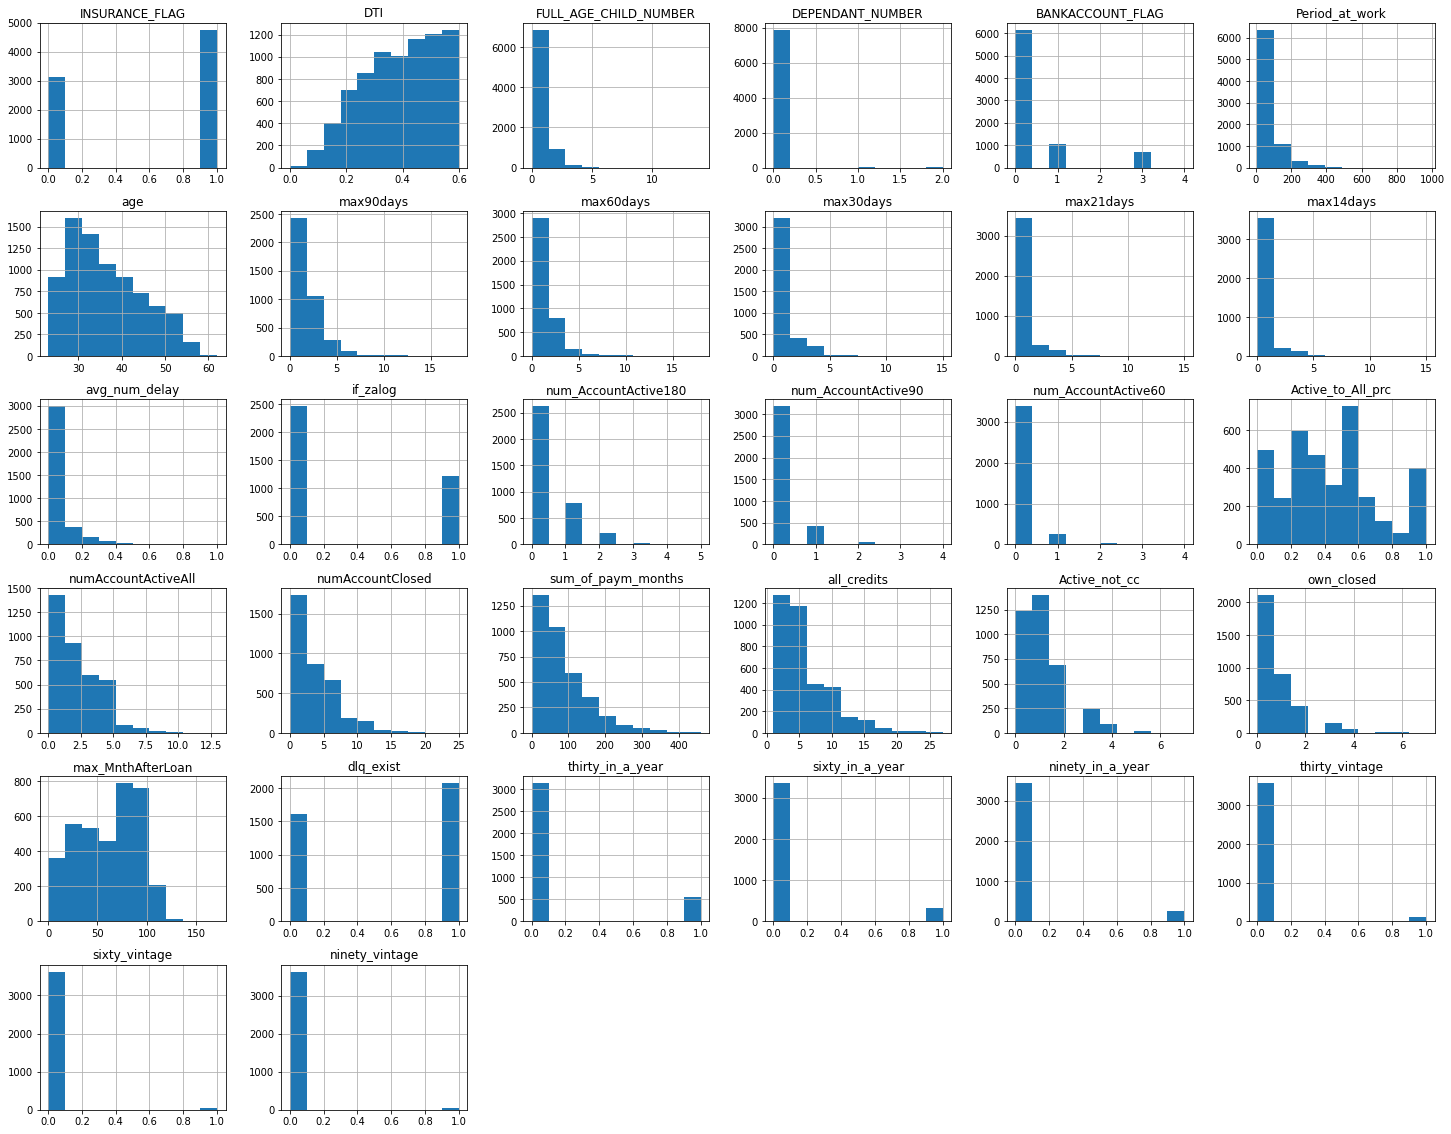

In [ ]:
#Проанализируем распределения данных (по числовым показателям, чтобы иметь более полное представление о данных
#Распределение данных по числовым переменным 
data.hist(bins=10, figsize=(25, 20))

Заметим, что большинство гистограмм имеют левостороннюю асимметрию (большинство значений находятся в первой трети), распределение значений коэффициента долга, напротив, скошено вправо, а по виду распределения значений отношений активных счетов ко всем счетам не дает определенной картины для сегментации. Соответственно, исходя из найденного признака, можно выделить следующие группы клиентов: 1) основная ЦА банка - молодежь и представители средневозрастной группы, клиентов старше 50 лет очень мало 2) Большая часть клиентов обладает низкой платежеспособностью, поскольку они имеют высокие значения DTI и низкое значение месяцев, когда они могут оплачивать кредиты. 3) Большинство клиентов имеет невысокое число активных счетов и кредитов. 4) Преобладают клиенты с низким количеством ней работы, что объясняет проблемы с выплатами долгов. 
Таким образом, проглядывается следующая сегментация: 1) молодые люди, начинающие карьеры и берущие минимум кредитов, а потому отличающиеся относительно невысокими доходами 2) Более платежеспособный сегмент ЦА средних лет, имеющий активные счета и активную кредитную историю 3) молодые люди, имеющий банковский счет, но еще не пользуещиеся кредитами. Бинарные переменные не отражают четкой информации, необходимой для кластеризации клиентов.

<Figure size 1800x1440 with 0 Axes>

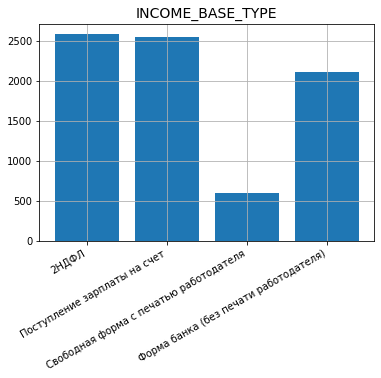

<Figure size 1800x1440 with 0 Axes>

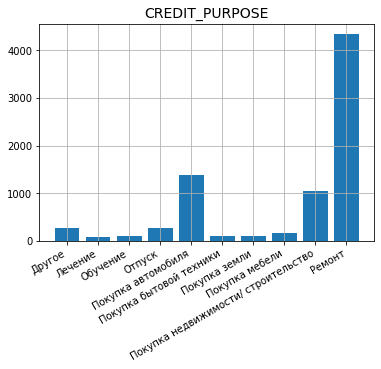

<Figure size 1800x1440 with 0 Axes>

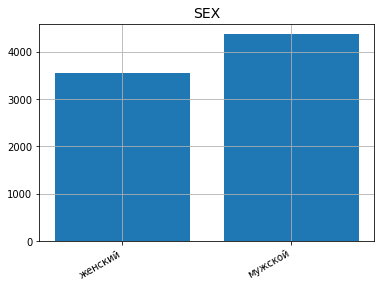

<Figure size 1800x1440 with 0 Axes>

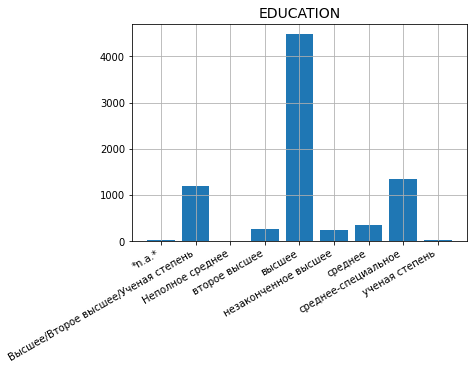

<Figure size 1800x1440 with 0 Axes>

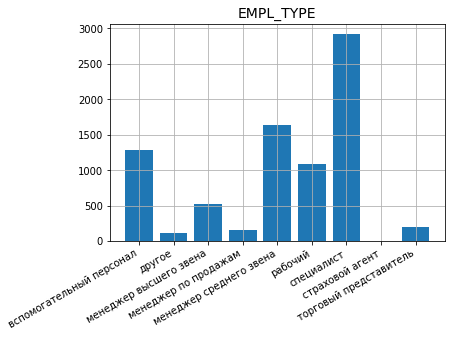

<Figure size 1800x1440 with 0 Axes>

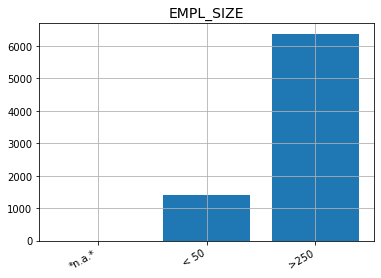

<Figure size 1800x1440 with 0 Axes>

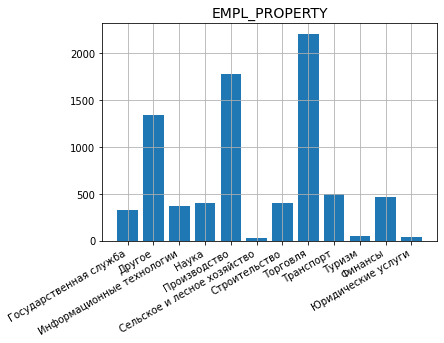

<Figure size 1800x1440 with 0 Axes>

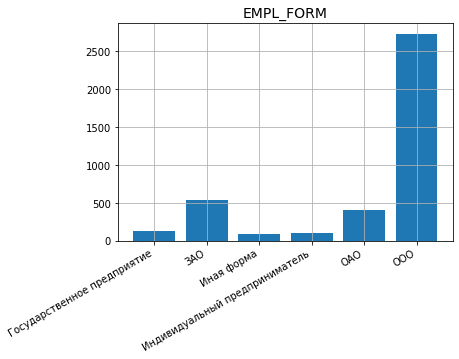

<Figure size 1800x1440 with 0 Axes>

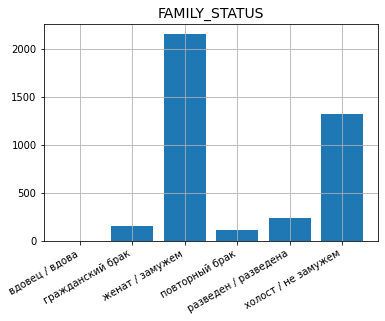

In [ ]:
#Распределение данных по категориальным переменным
for i in data.select_dtypes(object).columns:
    df = data.groupby(i).size().reset_index(name='counts')
    plt.figure(figsize=(25,20))
    fig, ax = plt.subplots()
    ax.grid()
    plt.bar(df[i], df['counts'])
    plt.gca().set_xticklabels(df[i], rotation=30, horizontalalignment= 'right')
    plt.title(i, fontsize=14)
    plt.show()

Исходя из анализа признаков можно выделить следующее: 1) Большая часть наших клиентов - представители мужского пола, находящиеся в браке 2) основные цели по кредитам: ремонт и покупка автомобиля 3) Основная часть ЦА имеет высшее образование, работает в сфере производства и торговли в качестве специалистов. Заметим, что по таким признакам, как пол, тип дохода и образование данные распределены относительно нормально, нет явной асимметрии, как в случае других признаков, соотвественно, переменные релевантно использовать в качестве индикаторов определения профилей клиентов.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


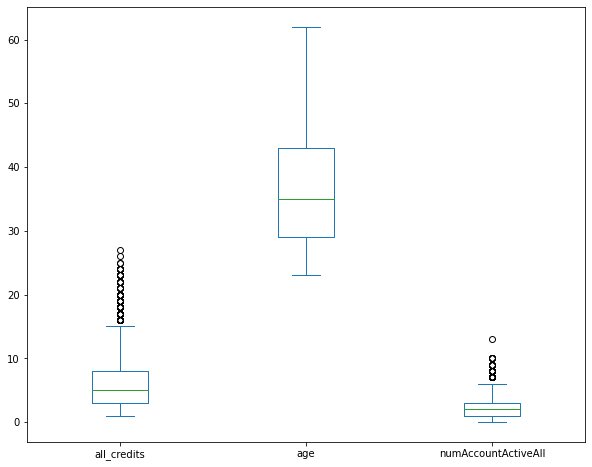

In [ ]:
#Посмотрим глубже на распределения числовых данных (по выбросам)
#Диаграммы Бокса по числовым переменным (возраст, количество открытых счетов, количество кредитов)
data[['all_credits', 'age', 'numAccountActiveAll']].plot(kind='box',figsize=(10,8))

Переменная "возраст" не имеет выбросов по сравненениюю с "количеством кредитов" и "количество активных счетов". 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


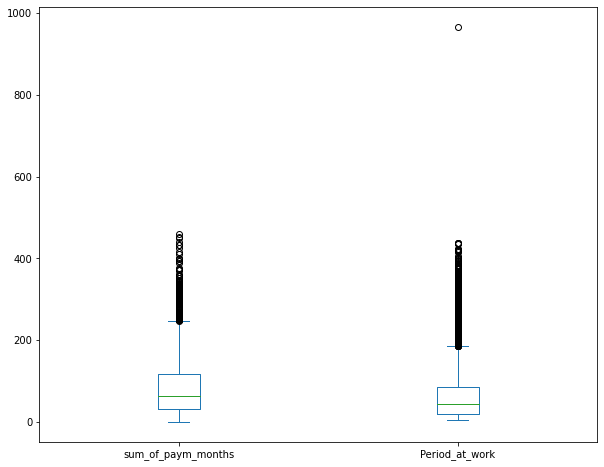

In [ ]:
#Диаграммы Бокса по числовым переменным (сумма платежей за последний месяц, время работы)
data[['sum_of_paym_months', 'Period_at_work']].plot(kind='box',figsize=(10,8))

Как видно, по выбраным переменным имеется большое количество выбросов. Возможно, использовать их в качестве основных при кластеризации данных будет не самым лучшим решением.

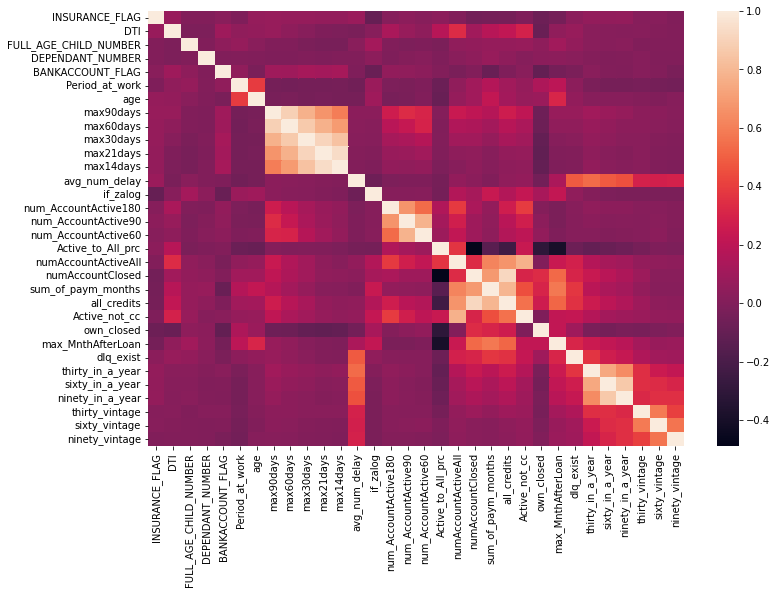

In [ ]:
#Проверим, применим ли регрессионный анализ в качестве метода кластеризации. Выведем корреляционную матрицу 
plt.figure(figsize = (12,8))
sns.heatmap(data.corr())

Как видно из тепловой карты, связь между большинством переменных довольно слабая, коэффициент корелляции не превышает 0,4. Соответственно, методы регрессионного анализа для дальнейшего анализа неприменимы.

# Вторичная корректировка данных и вывод финальной витрины

In [ ]:
# 1) Уберем не несущие в себе смысл для дальнейшей кластеризации столбцы с бинарными переменными, а также нормализуем данные для дальнейшей сегментации 
# 2) Заменим пустые значения в столбцах, где их больше половины, на -2
data.drop(['thirty_in_a_year', 'sixty_in_a_year',
       'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage',
       'ninety_vintage'], 1)
for i in data.select_dtypes(include=['int', 'float']).columns:
      data[i] = (data[i] - data[i].mean())/data[i].std()
data = data.fillna(-2)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,Active_not_cc,own_closed,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
1,Поступление зарплаты на счет,Покупка автомобиля,0.811984,0.473579,мужской,0.575670,-0.050882,высшее,менеджер среднего звена,>250,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
2,2НДФЛ,Ремонт,0.811984,0.768617,мужской,-0.699178,-0.050882,высшее,менеджер среднего звена,>250,...,-1.026784,-0.677192,0.160655,-1.135150,-0.416706,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008
4,Поступление зарплаты на счет,Ремонт,-1.231397,-1.665445,мужской,0.575670,-0.050882,высшее,менеджер высшего звена,>250,...,-1.026784,-0.677192,0.820211,-1.135150,-0.416706,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008
5,Поступление зарплаты на счет,Ремонт,-1.231397,-1.370407,женский,-0.699178,-0.050882,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,...,-0.076996,2.181948,0.160655,0.880701,-0.416706,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008
6,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,0.811984,0.768617,женский,-0.699178,-0.050882,высшее,специалист,>250,...,-1.026784,-0.677192,-0.136146,0.880701,-0.416706,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,Форма банка (без печати работодателя),Ремонт,0.811984,-1.001610,женский,-0.699178,-0.050882,высшее,вспомогательный персонал,>250,...,1.822580,-0.677192,-0.498901,0.880701,2.399122,-0.309804,-0.267186,5.692922,-0.120933,-0.115008
10237,2НДФЛ,Ремонт,0.811984,1.506211,женский,0.575670,-0.050882,высшее,вспомогательный персонал,>250,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
10239,Форма банка (без печати работодателя),Ремонт,0.811984,-0.559053,мужской,-0.699178,-0.050882,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,< 50,...,-0.076996,2.181948,1.117011,-1.135150,-0.416706,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008
10240,Свободная форма с печатью работодателя,Ремонт,0.811984,1.506211,мужской,-0.699178,-0.050882,высшее,менеджер среднего звена,>250,...,0.872792,-0.677192,0.358522,0.880701,2.399122,-0.309804,-0.267186,-0.175609,-0.120933,-0.115008


Таким образом, была финализирована корректировка данных: 
1) Убраны столбцы с неактуальными для экономического обоснования переменными 
2) Выбрано отрицательное число для замены пропусков, нормализированы данные для более четкой кластеризации 

In [ ]:
#Импортируем скорректированные данные в новый файл для части 2 
data.to_excel('Данные по клиентам банка.xlsx')